In [154]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [155]:
#Importing csv of just Arsenic results

ar_data_import = "../CA_Water_Analysis/Ar-Water-Lab-Data.csv"
ar_data = pd.read_csv(ar_data_import)
ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13460,03S01E11H001M,03S01E11H001M,03S01E11H001M,Groundwater,37.6881,121.8270,Review Status Unknown,Alameda,WDIS_0309039,07/11/1975 11:30,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,"Std Method 3500-As, C"
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003482,02/12/1975 00:00,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
2,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,03/05/1980 11:00,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
3,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,04/22/1986 13:35,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
4,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309041,05/06/1974 00:00,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic


In [156]:
#Looking at data, finding most recent data collected

sorted_ar_df = ar_data.sort_values(['sample_date'], ascending=False)
sorted_ar_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
16973,331,Check 21,CALIFORNIA AQU NR KETTLEMAN CK-21,KA017226,Surface Water,36.0142,119.9769,Review Status Unknown,Kings,OM1291A0583,12/31/1991 14:00,1.0,Feet,Dissolved Arsenic,0.002,0.001,mg/L,Std Method 3114 C
13695,347,Check 29,CALIFORNIA AQU A CHECK 29,KA024454,Surface Water,35.2320,119.3299,Review Status Unknown,Kern,OM1291A0582,12/31/1991 11:45,3.0,Feet,Dissolved Arsenic,0.002,0.001,mg/L,Std Method 3114 C
13990,350,KA029339,CALIFORNIA AQU A A.D. EDMONSTON,KA029339,Surface Water,34.9297,118.8182,Review Status Unknown,Kern,OM1291A0581,12/31/1991 09:30,3.0,Feet,Dissolved Arsenic,0.003,0.001,mg/L,Std Method 3114 C
26200,45966,03S28E35N001SM,03S28E35N001SM,03S28E35N001SM,Groundwater,37.6394,118.8617,Review Status Unknown,Mono,WDIS_0316468,12/31/1963 09:45,NaN,Feet,Total Arsenic,0.000,0.001,mg/L,UnkMod Arsenic
26214,45967,03S28E35N002SM,03S28E35N002SM,03S28E35N002SM,Groundwater,37.6394,118.8617,Review Status Unknown,Mono,WDIS_0813444,12/31/1963 00:00,NaN,Feet,Total Arsenic,0.000,0.001,mg/L,UnkMod Arsenic


In [157]:
#Looking at data, counting # of stations
station_num = sorted_ar_df['station_id'].unique().size
station_thing = sorted_ar_df.groupby(['station_id']).count()
sorted_station_thing = station_thing.sort_values(['station_name'], ascending=False)
sorted_station_thing.head()


,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
station_id,,,,,,,,,,,,,,,,,
12,856,856,856,856,856,856,856,856,856,856,856,856,856,854,856,856,856
331,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
80,836,836,836,836,836,836,836,836,836,836,832,836,836,836,836,836,836
347,752,752,752,752,752,752,752,752,752,752,752,752,752,750,752,752,752
384,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602


In [158]:
#Looking at data, graphing one station to see how data was collected

station_id = sorted_ar_df[(sorted_ar_df["station_id"]==12)]
#plt.plot(station_1['sample_date'], station_1['result'])
#plt.show

In [167]:
#Standardizing sample date in dataframe

for idx, row in ar_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    if int(year)>22: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'19{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    else: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'20{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    ar_data.loc[idx, 'sample_date']=new_date_str+' '+time

In [168]:
#Checking to see if for loop corrected the time issues

ar_data['sample_date'] = pd.to_datetime(ar_data['sample_date'])
ar_data = ar_data.sort_values(by='sample_date')
ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
34940,23888,08S01E10G004M,08S01E10G004M,08S01E10G004M,Groundwater,37.2546,121.8499,Review Status Unknown,Santa Clara,WDIS_0003987,1923-01-01,NaN,Feet,Total Arsenic,0.00,0.001,mg/L,UnkMod Arsenic
11994,41340,30S25E02A001M,30S25E02A001M,30S25E02A001M,Groundwater,35.3522,119.2548,Review Status Unknown,Kern,WDIS_0739687,1923-01-01,NaN,Feet,Total Arsenic,0.01,0.001,mg/L,UnkMod Arsenic
5958,32732,16N01W30J001M,16N01W30J001M,16N01W30J001M,Groundwater,39.2136,122.0076,Review Status Unknown,Colusa,WDIS_0301747,1923-01-01,NaN,Feet,Total Arsenic,0.00,0.001,mg/L,UnkMod Arsenic
33325,9878,02N06E33F001M,02N06E33F001M,02N06E33F001M,Groundwater,37.9771,121.3238,Review Status Unknown,San Joaquin,WDIS_0001127,1923-01-01,NaN,Feet,Total Arsenic,0.04,0.001,mg/L,UnkMod Arsenic
11873,40718,29S26E30A001M,29S26E30A001M,29S26E30A001M,Groundwater,35.3805,119.2171,Review Status Unknown,Kern,WDIS_0738620,1923-01-01,NaN,Feet,Total Arsenic,0.01,0.001,mg/L,UnkMod Arsenic


In [169]:
#Creating a df with all the counties I wanted to look into
 
county_df = ar_data.loc[(ar_data["county_name"] == "Los Angeles") |
                        (ar_data["county_name"] == "San Diego") |
                        (ar_data["county_name"] == "Orange") |
                        (ar_data["county_name"] == "Riverside") |
                        (ar_data["county_name"] == "Alameda") |
                        (ar_data["county_name"] == "Sacramento") |
                        (ar_data["county_name"] == "Alpine") |
                        (ar_data["county_name"] == "Sierra") |
                        (ar_data["county_name"] == "Modoc") |
                        (ar_data["county_name"] == "Contra Costa") |
                        (ar_data["county_name"] == "Santa Clara")]
county_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
34940,23888,08S01E10G004M,08S01E10G004M,08S01E10G004M,Groundwater,37.2546,121.8499,Review Status Unknown,Santa Clara,WDIS_0003987,1923-01-01 00:00:00,NaN,Feet,Total Arsenic,0.000,0.001,mg/L,UnkMod Arsenic
20672,405,Pyramid TU Outlet,PYRAMID LK A ANGELES Tunnel INtake Outlet,PY001000,Surface Water,34.6449,118.7642,Review Status Unknown,Los Angeles,OM0176A0041,1923-01-01 09:00:00,1.0,Feet,Dissolved Arsenic,0.000,0.010,mg/L,"Std Method 3500-As, C"
20673,405,Pyramid TU Outlet,PYRAMID LK A ANGELES Tunnel INtake Outlet,PY001000,Surface Water,34.6449,118.7642,Review Status Unknown,Los Angeles,OM0187A0031,1923-01-01 11:15:00,3.0,Feet,Dissolved Arsenic,0.000,0.001,mg/L,Std Method 3114 C
30686,45916,C3A - Hood,Sacramento River @ Hood - C3A,B9D82211312,Surface Water,38.3677,121.5205,Review Status Unknown,Sacramento,C0117B0132,1923-01-01 13:20:00,1.0,Meters,Dissolved Arsenic,0.000,0.001,mg/L,EPA 200.8 (D)
30687,45916,C3A - Hood,Sacramento River @ Hood - C3A,B9D82211312,Surface Water,38.3677,121.5205,Review Status Unknown,Sacramento,C0117B0132,1923-01-01 13:20:00,1.0,Meters,Total Arsenic,0.001,0.001,mg/L,EPA 200.8 (T)


In [170]:
#Checking to see that the time was sorted correctly by looking at the last 5 rows
#Checking to see what type of data the sample date is in 

ar_data.iloc[-5:]
ar_data.dtypes

station_id                     int64
station_name                  object
full_station_name             object
station_number                object
station_type                  object
latitude                     float64
longitude                    float64
status                        object
county_name                   object
sample_code                   object
sample_date           datetime64[ns]
sample_depth                 float64
sample_depth_units            object
parameter                     object
result                       float64
reporting_limit              float64
units                         object
method_name                   object
dtype: object

In [171]:
#Formatting the date in the dataset
ar_data['sample_date'].dt.year

34940    1923
11994    1923
5958     1923
33325    1923
11873    1923
         ... 
33985    2022
32470    2022
32871    2022
30919    2022
30920    2022
Name: sample_date, Length: 45996, dtype: int64

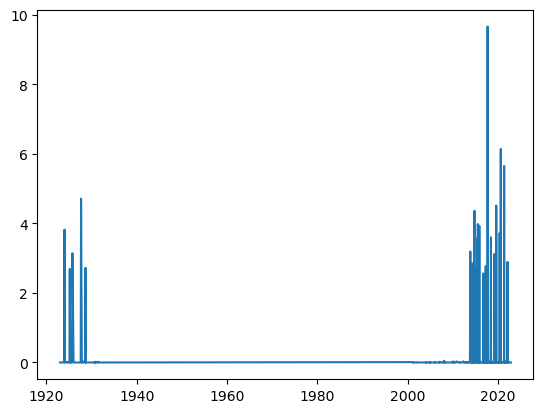

In [172]:
#Plotting LA county by all results taken at every station
#Each county following this was plotted the same way

LA = county_df.loc[county_df["county_name"] == "Los Angeles"]
plt.plot(LA["sample_date"], LA["result"])

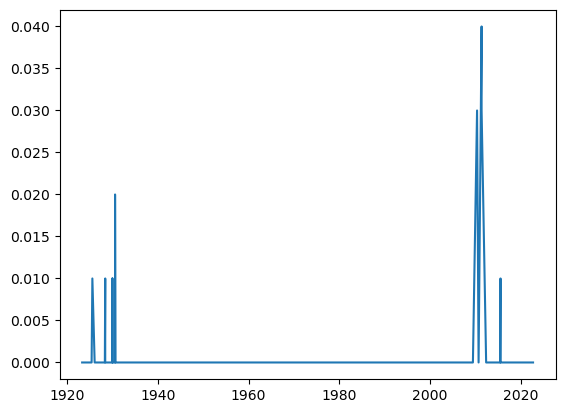

In [173]:
SD = county_df.loc[county_df["county_name"] == "San Diego"]
plt.plot(SD["sample_date"], SD["result"])

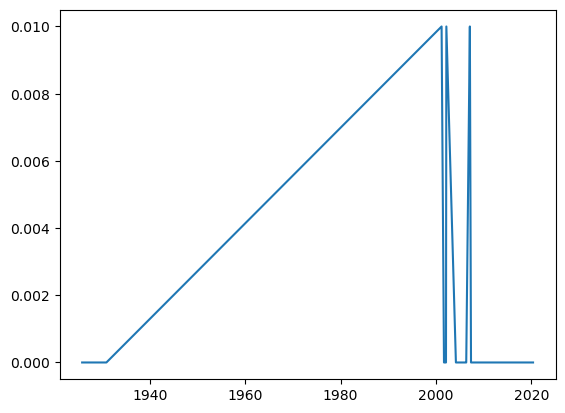

In [174]:
O = county_df.loc[county_df["county_name"] == "Orange"]
plt.plot(O["sample_date"], O["result"])

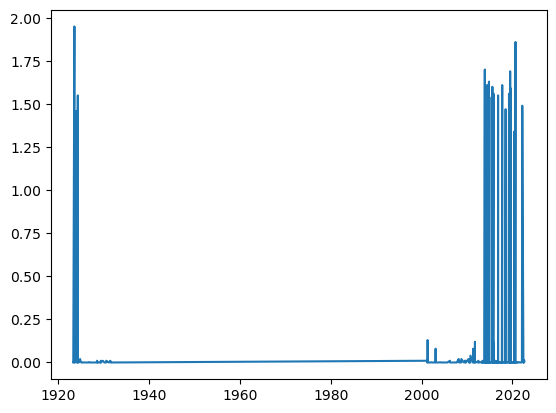

In [175]:
R = county_df.loc[county_df["county_name"] == "Riverside"]
plt.plot(R["sample_date"], R["result"])

In [176]:
# comments: LA and Riverside hige increases, especially LA
# Orange and SD spiked in 70s 

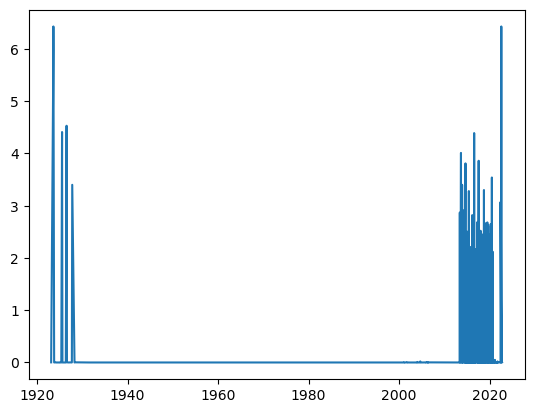

In [177]:
A = county_df.loc[county_df["county_name"] == "Alameda"]
plt.plot(A["sample_date"], A["result"])

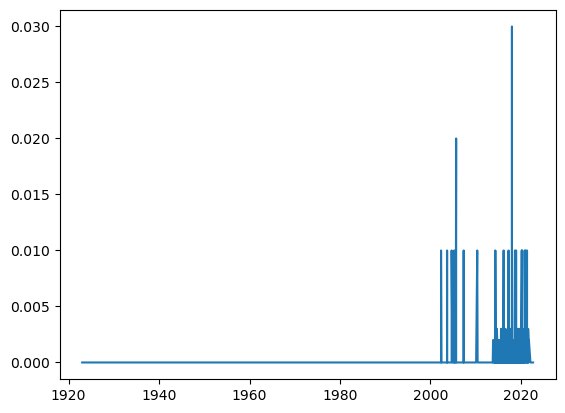

In [178]:
SC = county_df.loc[county_df["county_name"] == "Santa Clara"]
plt.plot(SC["sample_date"], SC["result"])

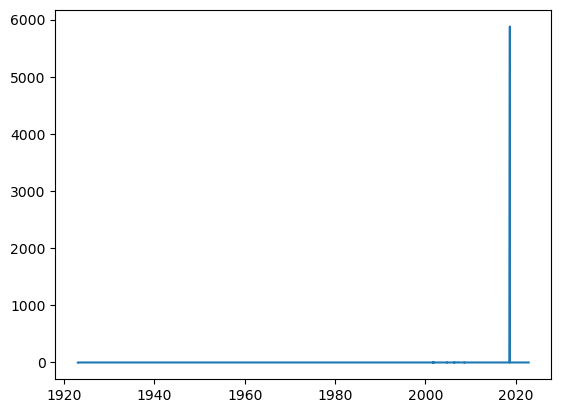

In [179]:
SAC = county_df.loc[county_df["county_name"] == "Sacramento"]
plt.plot(SAC["sample_date"], SAC["result"])

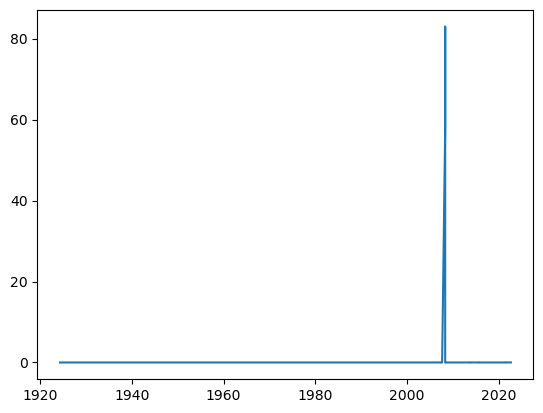

In [180]:
Al = county_df.loc[county_df["county_name"] == "Alpine"]
plt.plot(Al["sample_date"], Al["result"])

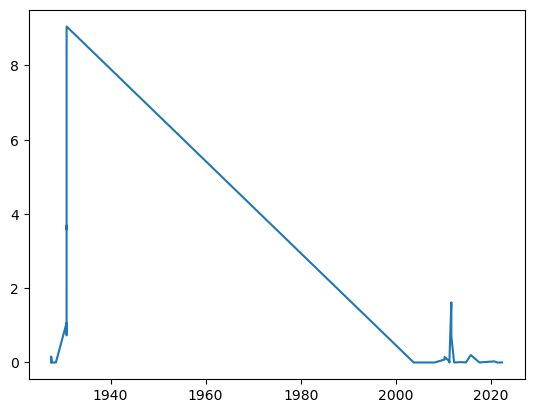

In [181]:
Si = county_df.loc[county_df["county_name"] == "Sierra"]
plt.plot(Si["sample_date"], Si["result"])

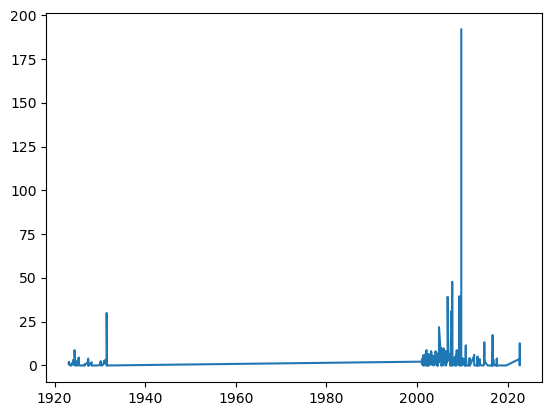

In [182]:
M = county_df.loc[county_df["county_name"] == "Modoc"]
plt.plot(M["sample_date"], M["result"])

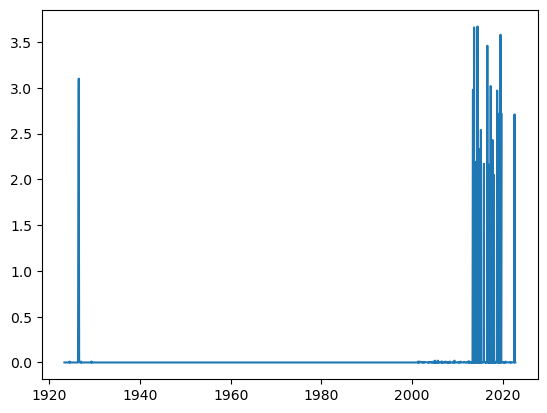

In [183]:
CC = county_df.loc[county_df["county_name"] == "Contra Costa"]
plt.plot(CC["sample_date"], CC["result"])


In [184]:
cc_df = county_df.loc[county_df["county_name"] == "Contra Costa"]

cc_unique = cc_df['station_id'].unique().size
cc_unique

95

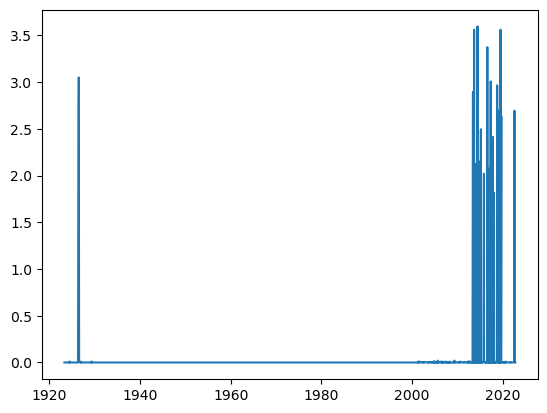

In [185]:
#Realized that we needed to take the mean result of each date between all the stations in the county
cc_avg = cc_df.groupby("sample_date").mean()["result"]

#Plotted mean station results per time per county for this and the following graphs
ccavdf = pd.DataFrame({"Contra Costa": cc_avg})
plt.plot(cc_avg)

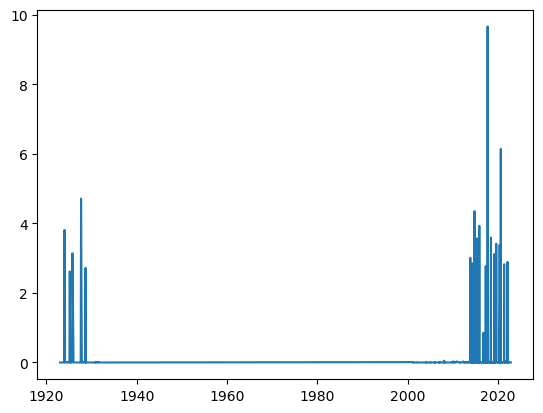

In [187]:
LA_df = county_df.loc[county_df["county_name"] == "Los Angeles"]
LA_avg = LA_df.groupby("sample_date").mean()["result"]
LA_avg
plt.plot(LA_avg)

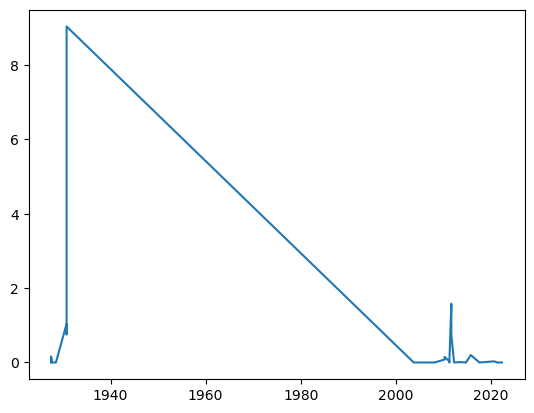

In [188]:
S_df = county_df.loc[county_df["county_name"] == "Sierra"]
S_avg = S_df.groupby("sample_date").mean()["result"]

plt.plot(S_avg)

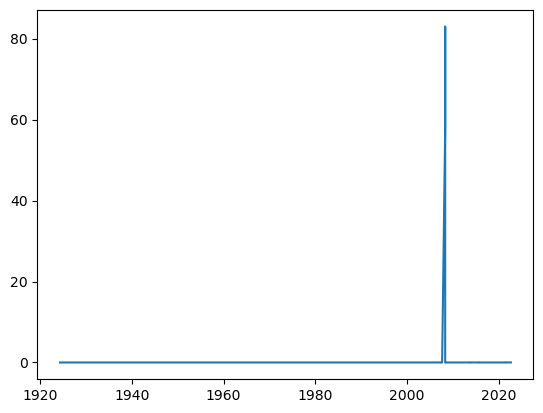

In [189]:
AL_df = county_df.loc[county_df["county_name"] == "Alpine"]
AL_avg = AL_df.groupby("sample_date").mean()["result"]

plt.plot(AL_avg)

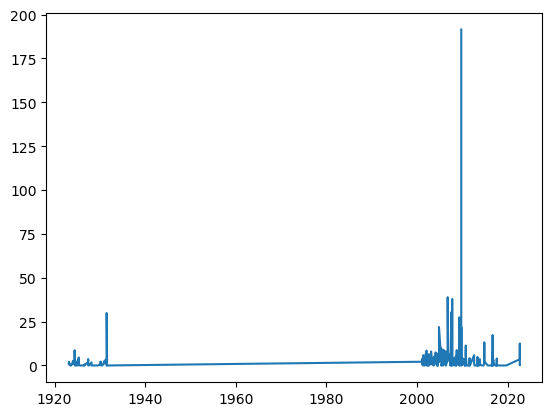

In [190]:
MO_df = county_df.loc[county_df["county_name"] == "Modoc"]
MO_avg = MO_df.groupby("sample_date").mean()["result"]

plt.plot(MO_avg)

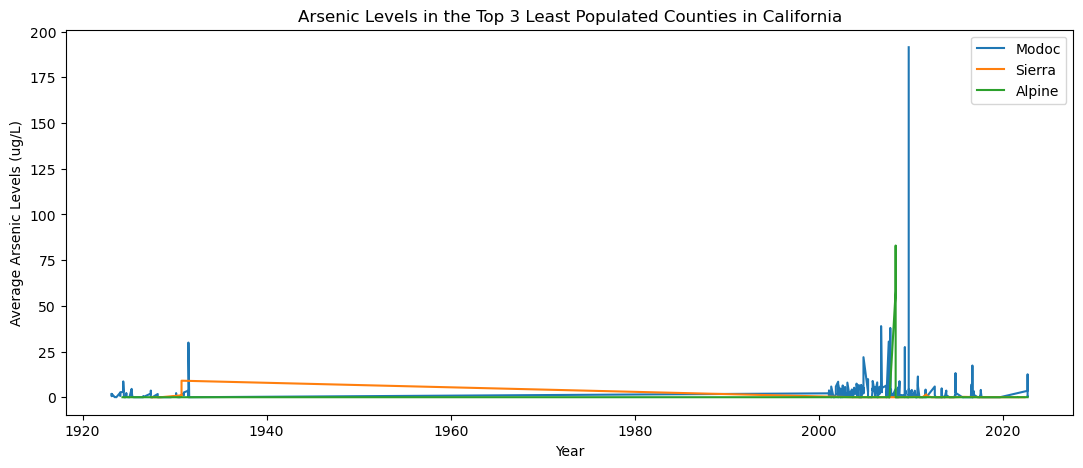

In [191]:
#Saw trends between population and reported arsenic levels
#Created stacked line graphs of top 3 most and least populated counties in CA

plt.figure(figsize=(13, 5)) 
plt.plot(MO_avg, label = "Modoc")
plt.plot(S_avg, label = "Sierra")
plt.plot(AL_avg, label = "Alpine")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 3 Least Populated Counties in California")
plt.legend()
plt.show()


In [192]:
#Set up for the graph of top 3 populated counties in CA
O_df = county_df.loc[county_df["county_name"] == "Orange"]
O_avg = O_df.groupby("sample_date").mean()["result"]
SD_df = county_df.loc[county_df["county_name"] == "San Diego"]
SD_avg = SD_df.groupby("sample_date").mean()["result"]

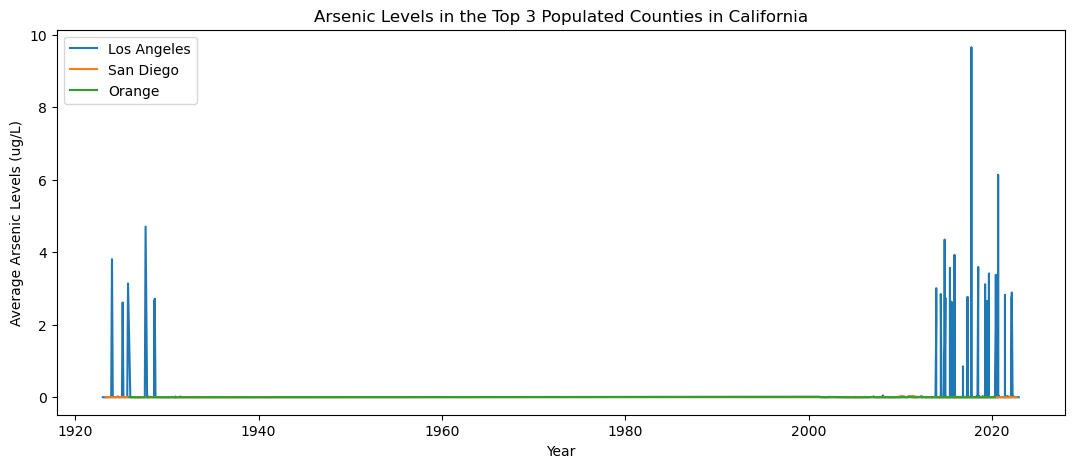

In [193]:
#Create graph of top 3 populated counties
plt.figure(figsize=(13, 5))  
plt.plot(LA_avg, label = "Los Angeles")
plt.plot(SD_avg, label = "San Diego")
plt.plot(O_avg, label = "Orange")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 3 Populated Counties in California")
plt.legend()
plt.show()

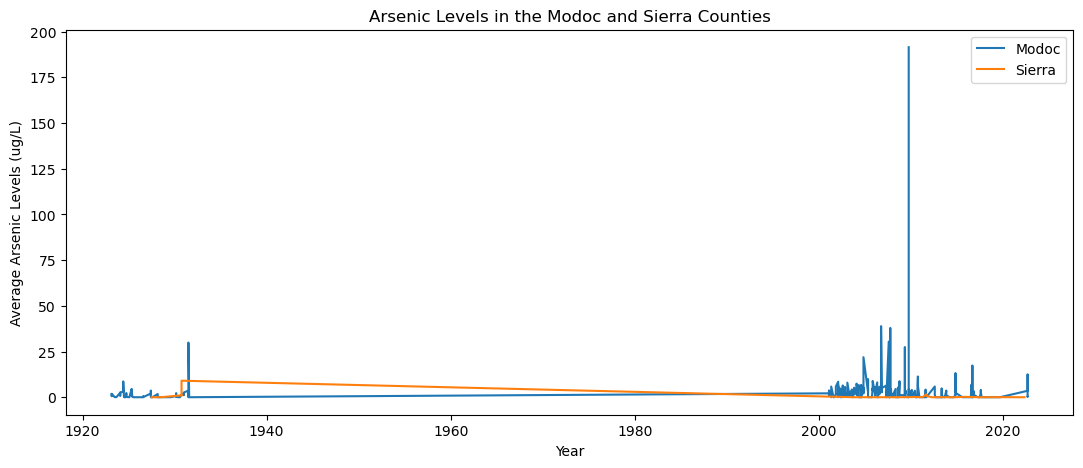

In [194]:
#Created graph of Modoc and Sierra county without the spikes seen in Alpine county for better visualization
plt.figure(figsize=(13, 5)) 
plt.plot(MO_avg, label = "Modoc")
plt.plot(S_avg, label = "Sierra")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Modoc and Sierra Counties")
plt.legend()
plt.show()


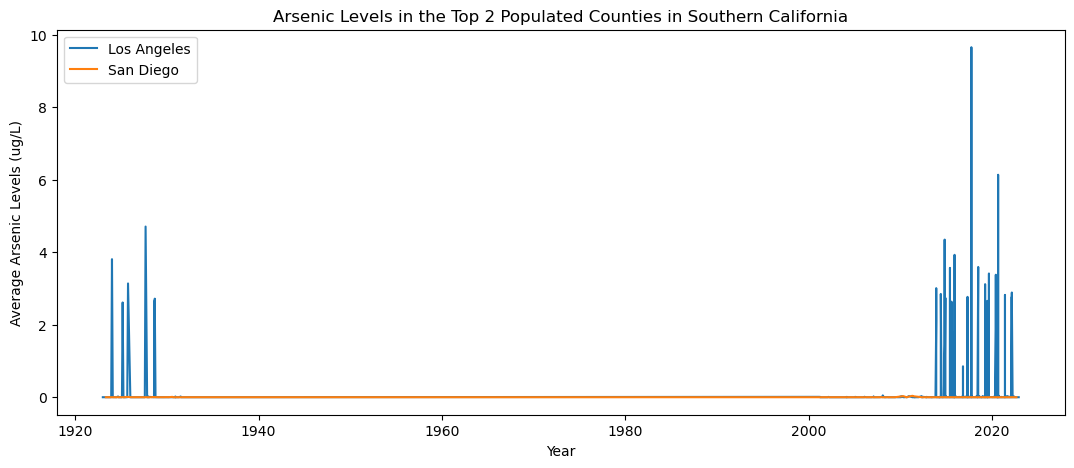

In [195]:
#Graph top two populated counties in socal
plt.figure(figsize=(13, 5))  
plt.plot(LA_avg, label = "Los Angeles")
plt.plot(SD_avg, label = "San Diego")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 2 Populated Counties in Southern California")
plt.legend()
plt.show()

In [198]:
#Creating dfs for the mean for top two populated counties in norcal
A_df = county_df.loc[county_df["county_name"] == "Alameda"]
A_avg = A_df.groupby("sample_date").mean()["result"]
SAC_df = county_df.loc[county_df["county_name"] == "Sacramento"]
SAC_avg = SAC_df.groupby("sample_date").mean()["result"]


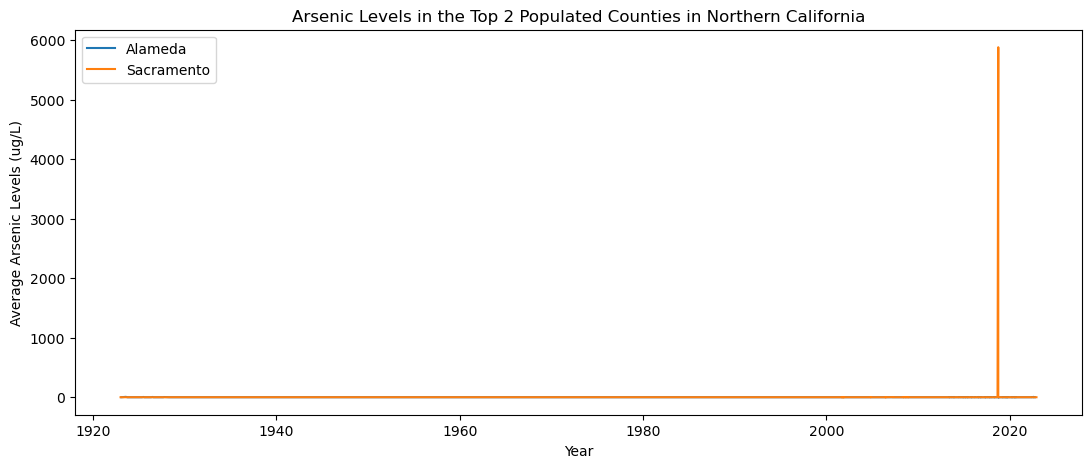

In [199]:
#Plotting top two populated counties in norcal
plt.figure(figsize=(13, 5))  
plt.plot(A_avg, label = "Alameda")
plt.plot(SAC_avg, label = "Sacramento")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 2 Populated Counties in Northern California")
plt.legend()
plt.show()

In [208]:
#Fixing Sacramento data by getting rid of the outliar
fixedSAC = SAC_avg.loc[SAC_avg < 1000]


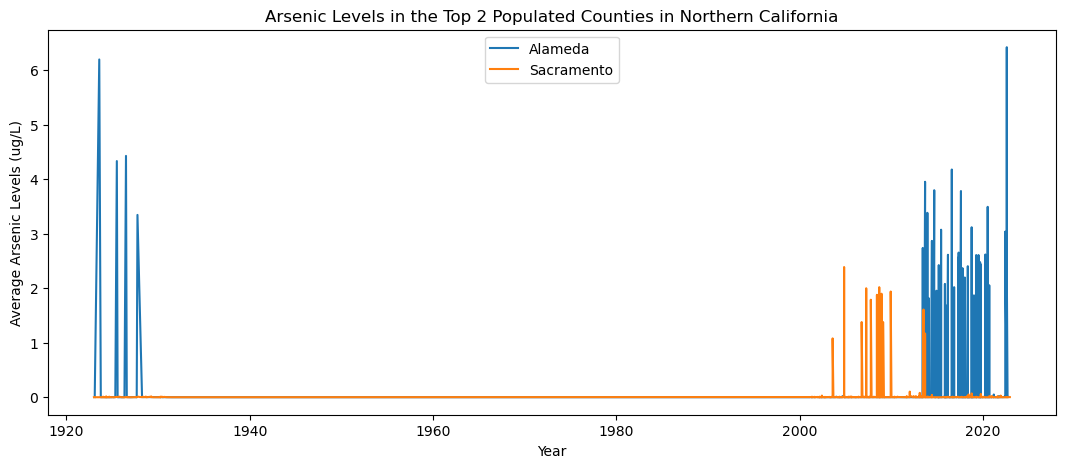

In [207]:
#Plotting top two populated counties in norcal after fixing for outliar
plt.figure(figsize=(13, 5))  
plt.plot(A_avg, label = "Alameda")
plt.plot(fixedSAC, label = "Sacramento")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 2 Populated Counties in Northern California")
plt.legend()
plt.show()

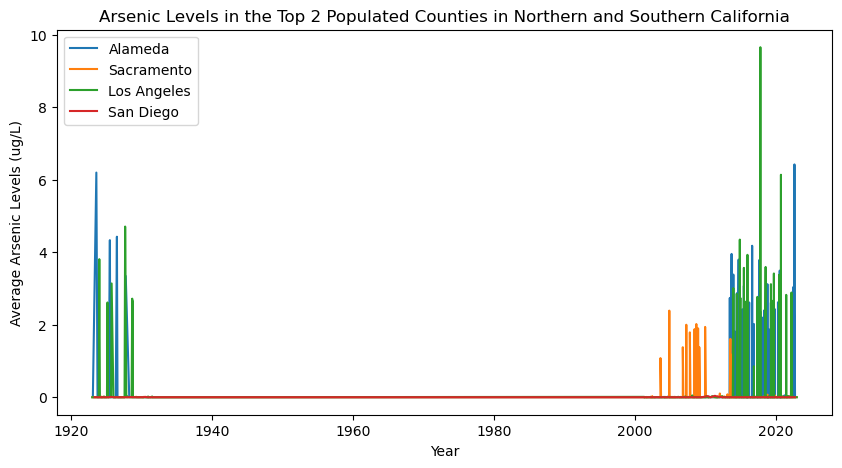

In [231]:
#Merge into one big graph
plt.figure(figsize=(10, 5))  
plt.plot(A_avg, label = "Alameda")
plt.plot(fixedSAC, label = "Sacramento")
plt.plot(LA_avg, label = "Los Angeles")
plt.plot(SD_avg, label = "San Diego")
plt.xlabel("Year")
plt.ylabel("Average Arsenic Levels (ug/L)")
plt.title("Arsenic Levels in the Top 2 Populated Counties in Northern and Southern California")
plt.legend()
plt.show()

# Mercury Data

In [210]:
#Importing csv of just Mercury results

mer_data_import = "../CA_Water_Analysis/Mer-Water-Lab-Data.csv"
mer_data = pd.read_csv(ar_data_import)
mer_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury


In [211]:
#Standardizing sample date in dataframe

for idx, row in mer_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    if int(year)>22: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'19{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    else: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'20{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    mer_data.loc[idx, 'sample_date']=new_date_str+' '+time

In [212]:
#Checking to see if for loop corrected the time issues
mer_data['sample_date'] = pd.to_datetime(mer_data['sample_date'])
mer_data = mer_data.sort_values(by='sample_date')
mer_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
1503,2917,MARSH C BL DUNN C,MARSH C BL DUNN C,B8916410,Surface Water,37.8966,121.8697,Review Status Unknown,Contra Costa,WDIS_0007717,1952-04-28 00:00:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury
1510,2920,DUNN C AB DAM AB DIA,DUNN C AB DAM AB DIABLO MINE SEEP,B8916530,Surface Water,37.9013,121.8744,Review Status Unknown,Contra Costa,WDIS_0007726,1952-04-28 00:00:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury
1502,2913,MARSH C A DEER VLY R,MARSH C A DEER VLY RD,B8911710,Surface Water,37.8846,121.7761,Review Status Unknown,Contra Costa,WDIS_0007714,1952-04-28 13:30:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury
1506,2919,DUNN C TRIB-MT DIABL,DUNN C TRIB-MT DIABLO MINE SEEP,B8916525,Surface Water,37.9010,121.8788,Review Status Unknown,Contra Costa,WDIS_0007721,1952-04-28 14:10:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury
1505,2918,DUNN C A MORGAN TERR,DUNN C A MORGAN TERRITORY RD BR,B8916520,Surface Water,37.8813,121.8725,Review Status Unknown,Contra Costa,WDIS_0007720,1952-04-28 14:30:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury


In [213]:
#Formatting the date in the dataset
mer_data['sample_date'].dt.year

1503     1952
1510     1952
1502     1952
1506     1952
1505     1952
         ... 
17009    2022
17010    2022
17028    2022
17029    2022
17202    2022
Name: sample_date, Length: 17280, dtype: int64

In [215]:
#Creating a df with all the counties I wanted to look into
 
mer_county_df = mer_data.loc[(ar_data["county_name"] == "Los Angeles") |
                             (ar_data["county_name"] == "San Diego") |
                             (ar_data["county_name"] == "Alameda") |
                             (ar_data["county_name"] == "Sacramento") ]
mer_county_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
6133,6040,BALLONA C AT LINCOLN,BALLONA C AT LINCOLN BLVD,Z5320010,Surface Water,33.9750,118.4326,Review Status Unknown,Los Angeles,WDIS_0976476,1971-03-17 06:15:00,NaN,Feet,Dissolved Mercury,40.0,0.001,ug/L,UnkH Mercury
6570,6100,SAN GABRIEL R A PACI,SAN GABRIEL R A PACIFIC COAST HWY,Z8106010,Surface Water,33.7520,118.1065,Review Status Unknown,Los Angeles,WDIS_0230858,1971-03-17 06:50:00,NaN,Feet,Dissolved Mercury,30.0,0.001,ug/L,UnkH Mercury
6692,6131,RIO HONDO R NR DOWNE,RIO HONDO R NR DOWNEY,Z8517000,Surface Water,33.9467,118.1626,Review Status Unknown,Los Angeles,WDIS_0232015,1971-03-17 07:00:00,NaN,Feet,Dissolved Mercury,10.0,0.001,ug/L,UnkH Mercury
6271,6049,LOS ANGELES R A WILL,LOS ANGELES R A WILLOW ST,Z6112010,Surface Water,33.8042,118.2051,Review Status Unknown,Los Angeles,WDIS_0228862,1971-04-01 06:10:00,NaN,Feet,Dissolved Mercury,0.0,0.001,ug/L,UnkH Mercury
6355,6060,LOS ANGELES R A TUJU,LOS ANGELES R A TUJUNGA AVE,Z6136500,Surface Water,34.1408,118.3795,Review Status Unknown,Los Angeles,WDIS_0229853,1971-04-01 06:30:00,NaN,Feet,Dissolved Mercury,10.0,0.001,ug/L,UnkH Mercury


In [216]:
#Creating dfs for the mean for each county with Mercury
merA_df = mer_county_df.loc[mer_county_df["county_name"] == "Alameda"]
merA_avg = merA_df.groupby("sample_date").mean()["result"]

merSAC_df = mer_county_df.loc[mer_county_df["county_name"] == "Sacramento"]
merSAC_avg = merSAC_df.groupby("sample_date").mean()["result"]

merLA_df = mer_county_df.loc[mer_county_df["county_name"] == "Los Angeles"]
merLA_avg = merLA_df.groupby("sample_date").mean()["result"]

merSD_df = mer_county_df.loc[mer_county_df["county_name"] == "San Diego"]
merSD_avg = merSD_df.groupby("sample_date").mean()["result"]



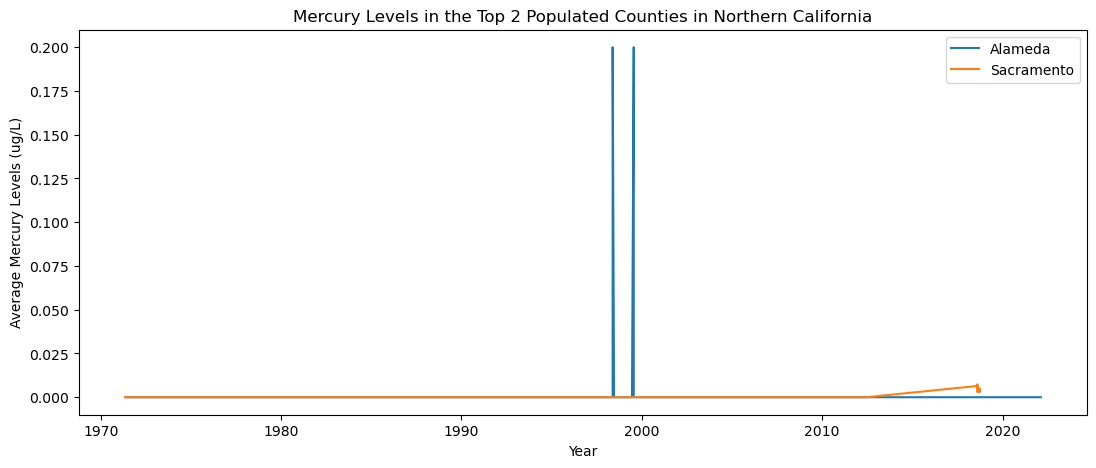

In [224]:
#Plotting top two populated counties in norcal with mercury
plt.figure(figsize=(13, 5))  
plt.plot(merA_avg, label = "Alameda")
plt.plot(merSAC_avg, label = "Sacramento")
plt.xlabel("Year")
plt.ylabel("Average Mercury Levels (ug/L)")
plt.title("Mercury Levels in the Top 2 Populated Counties in Northern California")
plt.legend()
plt.show()

In [219]:
#Fixing Alameda data by getting rid of the outliars
mer_fixedA = merA_avg.loc[merA_avg < 0.150]


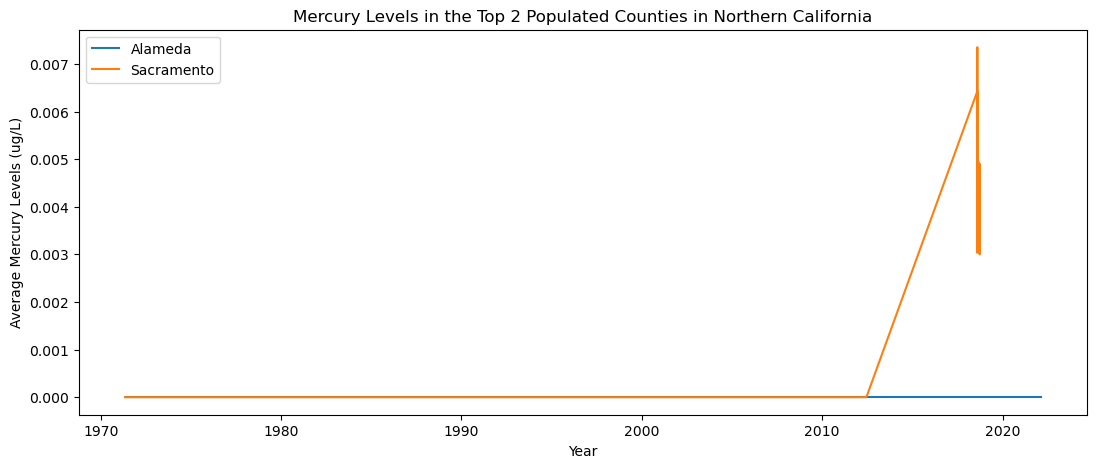

In [223]:
#Plotting top two populated counties in norcal with mercury
plt.figure(figsize=(13, 5))  
plt.plot(mer_fixedA, label = "Alameda")
plt.plot(merSAC_avg, label = "Sacramento")
plt.xlabel("Year")
plt.ylabel("Average Mercury Levels (ug/L)")
plt.title("Mercury Levels in the Top 2 Populated Counties in Northern California")
plt.legend()
plt.show()

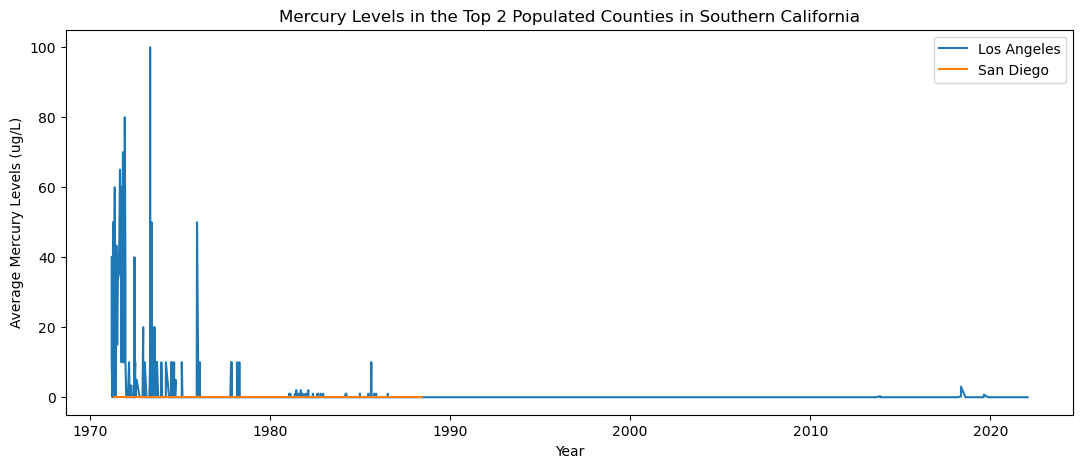

In [225]:
#Graph top two populated counties in socal for Mercury
plt.figure(figsize=(13, 5))  
plt.plot(merLA_avg, label = "Los Angeles")
plt.plot(merSD_avg, label = "San Diego")
plt.xlabel("Year")
plt.ylabel("Average Mercury Levels (ug/L)")
plt.title("Mercury Levels in the Top 2 Populated Counties in Southern California")
plt.legend()
plt.show()

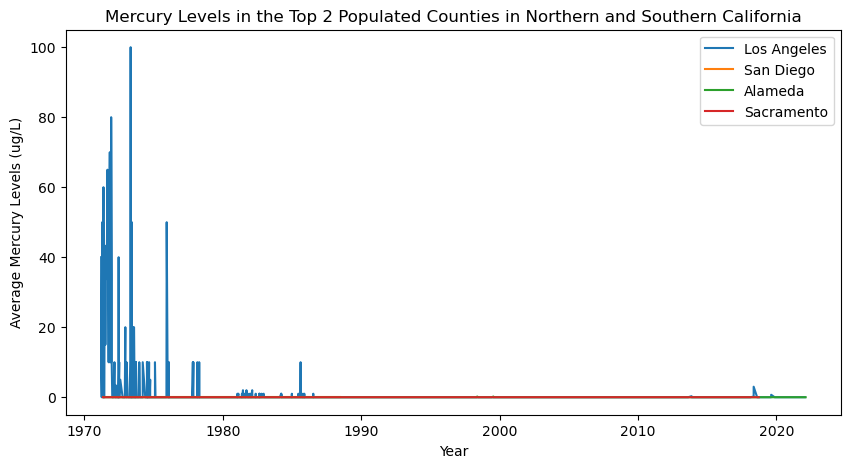

In [233]:
#Create graph for mercury for all counties 
plt.figure(figsize=(10, 5))  
plt.plot(merLA_avg, label = "Los Angeles")
plt.plot(merSD_avg, label = "San Diego")
plt.plot(merA_avg, label = "Alameda")
plt.plot(merSAC_avg, label = "Sacramento")
plt.xlabel("Year")
plt.ylabel("Average Mercury Levels (ug/L)")
plt.title("Mercury Levels in the Top 2 Populated Counties in Northern and Southern California")
plt.legend()
plt.show()

# NO3

In [228]:
#Importing csv of just NO3 results

no_data_import = "../CA_Water_Analysis/NO3_Water_Lab_Data.csv"
no_data = pd.read_csv(no_data_import)
no_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,8166,01S04W04A001M,01S04W04A001M,01S04W04A001M,Groundwater,37.8788,122.3027,Review Status Unknown,Alameda,WDIS_0744258,08/29/1977 08:30,NaN,Feet,Dissolved Nitrate,5.6,0.1,mg/L,EPA 352.1 (DWR Modified)
1,8445,01S04W34F002M,01S04W34F002M,01S04W34F002M,Groundwater,37.8037,122.2938,Review Status Unknown,Alameda,WDIS_0744281,08/14/1973 11:00,NaN,Feet,Dissolved Nitrate,12.0,0.1,mg/L,EPA 352.1 (DWR Modified)
2,8446,01S04W34F004M,01S04W34F004M,01S04W34F004M,Groundwater,37.8037,122.2938,Review Status Unknown,Alameda,WDIS_0744282,07/18/1975 09:05,NaN,Feet,Dissolved Nitrate,9.9,0.1,mg/L,EPA 352.1 (DWR Modified)
3,8446,01S04W34F004M,01S04W34F004M,01S04W34F004M,Groundwater,37.8037,122.2938,Review Status Unknown,Alameda,WDIS_0744283,08/29/1977 12:00,NaN,Feet,Dissolved Nitrate,7.7,0.1,mg/L,EPA 352.1 (DWR Modified)
4,11157,02S02E35F001M,02S02E35F001M,02S02E35F001M,Groundwater,37.7170,121.7264,Review Status Unknown,Alameda,WDIS_0744638,08/16/1974 11:55,NaN,Feet,Dissolved Nitrate,81.0,0.1,mg/L,EPA 352.1 (DWR Modified)


In [229]:
#Standardizing sample date in dataframe

for idx, row in no_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    if int(year)>22: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'19{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    else: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'20{year}']
        # print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    no_data.loc[idx, 'sample_date']=new_date_str+' '+time